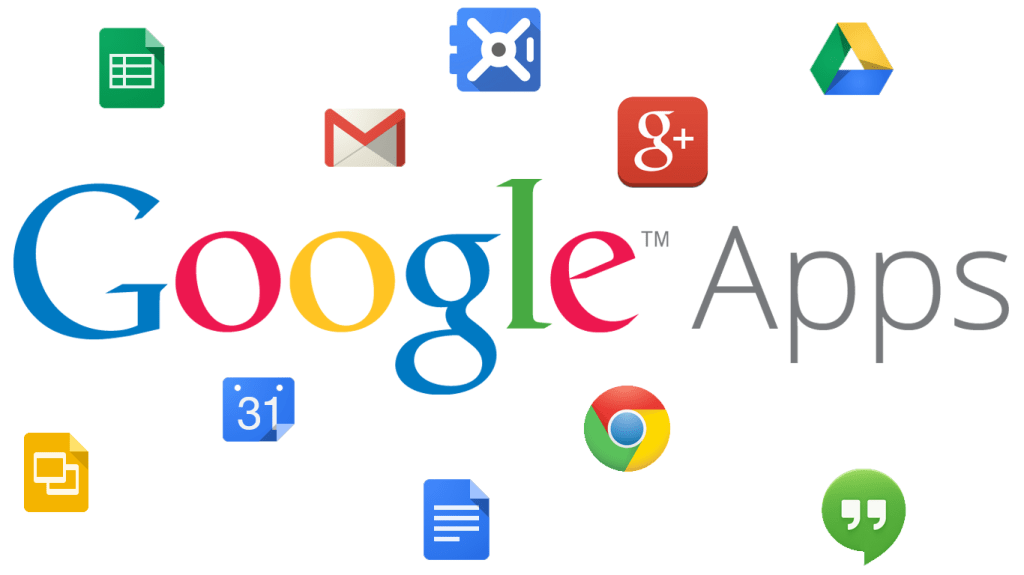

# Projeto 1 - Análise de Dados com Python com Aplicativos da **Google Apps Store**

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

In [ ]:
df = pd.read_csv('./data/googleplaystore.csv')
df.head(3)

## a. Entender o que temos a disposição

In [ ]:
df.shape

In [ ]:
df.columns

In [ ]:
df.describe()

In [ ]:
df.info()

## b. Limpeza (remoção dos Nulos e Duplicados)

In [ ]:
# Verificar os nulos
df.isnull().sum()

In [ ]:
df.shape

In [ ]:
# Eliminar dados desaparecidos
df.dropna(how='any', inplace=True)
df.isnull().sum()

In [ ]:
df.shape

In [ ]:
# Verificar Duplicados
df.duplicated().sum()

In [ ]:
# Eliminar os duplicados
df.drop_duplicates(inplace=True)
df.head(3)

In [ ]:
# Verificar o resultado
df.duplicated().sum()

In [ ]:
df.shape

## c. Regularização dos Dados

### c1. Dados Numéricos

In [ ]:
df = pd.read_csv('./data/googleplaystore.csv')
df.head(3)

In [ ]:
df.Rating.describe()

In [ ]:
# Distribuição dos dados
df.Rating.plot()

In [ ]:
# Localizar este valor
df[df['Rating'] > 10]

In [ ]:
# Eliminar este valor
df = df.drop([10472])
df.Rating.describe()

In [ ]:
# Histograma
df.Rating.plot(kind='hist')

In [ ]:
# the most hight rate apps
df.sort_values(by=['Rating'], ascending=False, inplace=True)
df.head(3)

## c2. Dados Categóricos

In [ ]:
# Quem são
df['Category'].unique()

In [ ]:
# Quantas são?
len(df['Category'].unique())

In [ ]:
# Quantas são por categoria?
df['Category'].value_counts()

In [ ]:
# Mostrar isso graficamente
# plt.figure(figsize = (20,20))
df['Category'].value_counts().plot(kind='barh')

In [ ]:
# plt.figure(figsize = (20,20))
df['Category'].value_counts().sort_values(ascending=True).plot(kind='barh')

## c3. Tipos Errados

In [ ]:
df['Reviews'].dtype

In [ ]:
# Modificar para inteiro (através de uma função lambda)
df['Reviews'] = df['Reviews'].apply(lambda x : int(x))
df['Reviews'].dtype

In [ ]:
# Distribuição
df['Reviews'].plot() # (kind='hist')

In [ ]:
df.describe()

In [ ]:
# Encontrar o Top 10 dos Maiores Reviews
df.sort_values(by=['Reviews'], ascending=False, inplace=True)
df.head(10)

## c4 - Valores Misturados 

In [ ]:
df['Size'].unique()

In [ ]:
# Quantas linhas com 'Varies with device'?
len(df[df['Size']=='Varies with device'])

In [ ]:
# Trocar 'Varies with device' pelo valor 'NaN'
df['Size'].replace('Varies with device', np.nan, inplace=True)
len(df[df['Size']=='Varies with device'])

In [ ]:
# Função para realizar as conversões de tipo
def convert_size(size):
    if size is not np.nan:
        if 'k' in size:
            return float(size.replace('k','')) * 1000
        if 'M' in size:
            return float(size.replace('M','')) * 1000000
        
# Aplica ao tamanho
df['Size'] = df['Size'].apply(convert_size)

In [ ]:
# Coloca os valores NaN para a média
# df['Size'].mean()

In [ ]:
# Coloca os valores NaN para a média por CATEGORIA
df['Size'].fillna(df['Size'].mean(), inplace=True)
df['Size'].unique()

In [ ]:
# print largest size apps
df.sort_values(by=['Size'], ascending=False, inplace=True)
df['Size'].plot(kind='hist')

## c5. Detalhes a mais

In [ ]:
# CASO 'Installs'
df['Installs'].head()

In [ ]:
# Need to convert install data
# remove +
# remove ,
# convert to int number
def convert_install(number):
    return int(number.replace('+','').replace(',',''))

df['Installs'] = df['Installs'].apply(convert_install)
df.head()

In [ ]:
df.describe()

In [ ]:
# CASO 'Price'
df['Price'].unique()

In [ ]:
def convert_price(price):
    if '$' in str(price):
        return float(price.replace('$',''))
    else:
        return float(price)

df['Price'] = df['Price'].apply(convert_price)
df.describe()

In [ ]:
df['Price'].plot(kind='hist')

In [ ]:
# Caso 'Genres' - Multiplos valores na mesma coluna
df['Genres'].unique()

In [ ]:
# print number or genres
len(df['Genres'].unique())

In [ ]:
# only get genres before ; and remove all remain
# print out the unique genre
df['Genres'] = df['Genres'].str.split(';').str[0]
df['Genres'].unique()

In [ ]:
len(df['Genres'].unique())

## Situação Final

In [ ]:
df

In [ ]:
df.info()

Obrigado e até a próxima \
Fernando Anselmo